In [24]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [128]:
#get raw data and choose close of reliance stock
raw_df = pd.read_csv('/home/webwerks/Downloads/RELIANCE.NS.csv')
print(raw_df.tail(10))
raw_df =raw_df[['Close']]
raw_df.loc[(raw_df!=0.0).any(axis=1)]
raw_df.dropna(inplace= True)
raw_df.head(50)

            Date         Open         High          Low        Close  \
6515  2021-11-10  2516.699951  2558.000000  2503.649902  2549.899902   
6516  2021-11-11  2540.050049  2570.500000  2535.550049  2554.550049   
6517  2021-11-12  2562.899902  2598.750000  2557.000000  2593.100098   
6518  2021-11-15  2600.000000  2602.199951  2570.000000  2577.800049   
6519  2021-11-16  2572.050049  2575.000000  2495.000000  2517.899902   
6520  2021-11-17  2498.949951  2498.949951  2461.000000  2464.000000   
6521  2021-11-18  2460.000000  2489.000000  2450.050049  2473.300049   
6522  2021-11-22  2436.100098  2449.000000  2351.000000  2363.750000   
6523  2021-11-23  2333.050049  2401.250000  2309.000000  2385.850098   
6524  2021-11-24  2380.000000  2409.899902  2343.550049  2351.399902   

        Adj Close      Volume  
6515  2549.899902   4731975.0  
6516  2554.550049   4948422.0  
6517  2593.100098   4020744.0  
6518  2577.800049   2216708.0  
6519  2517.899902   5232292.0  
6520  2464.0000

,Close
0,15.917452
1,15.793671
2,15.913584
3,15.766594
4,15.658285
5,15.031645
6,14.598411
7,14.223200
8,14.668038
9,14.513312


In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
raw_df1=scaler.fit_transform(np.array(raw_df).reshape(-1,1))
# raw_df = list(raw_df)
print(raw_df1.shape)
raw_df2=[item for sublist in raw_df1 for item in sublist]

(6507, 1)


In [174]:
def create_dataset(raw_df,lag=100):
#     input_data = raw_df['Close'].to_list()
    input_data = raw_df2
    output_data_x = [input_data[:lag]]
    output_data_y = [input_data[lag]]
    for i in input_data[lag+1:]:
        temp = output_data_x[-1].copy()
        temp.append(output_data_y[-1])
        output_data_x.append(temp[1:])
        output_data_y.append(i)
    return np.array(output_data_x),np.array(output_data_y)
    
dataset_x,dataset_y = create_dataset(raw_df)

In [175]:
test_dataset_x = dataset_x[5000:]
train_dataset_x = dataset_x[:5000]
test_dataset_y = dataset_y[5000:]
train_dataset_y = dataset_y[:5000]
train_dataset_y[1]

0.0024972718397868856

<AxesSubplot:>

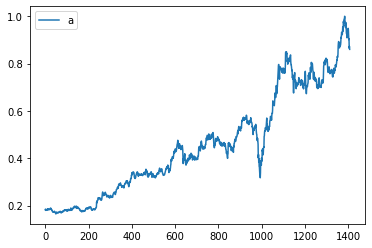

In [176]:
data = pd.DataFrame(test_dataset_y,columns=['a'])
data.plot(y='a',use_index=True)

In [177]:
data2 =pd.DataFrame(test_dataset_x)
data2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.157215,0.158016,0.158353,0.160056,0.160192,0.162214,0.171082,0.169844,0.169534,0.169652,...,0.170863,0.168560,0.169106,0.167549,0.168687,0.171655,0.174323,0.178002,0.180068,0.178894
1,0.158016,0.158353,0.160056,0.160192,0.162214,0.171082,0.169844,0.169534,0.169652,0.167321,...,0.168560,0.169106,0.167549,0.168687,0.171655,0.174323,0.178002,0.180068,0.178894,0.182645
2,0.158353,0.160056,0.160192,0.162214,0.171082,0.169844,0.169534,0.169652,0.167321,0.166721,...,0.169106,0.167549,0.168687,0.171655,0.174323,0.178002,0.180068,0.178894,0.182645,0.185322
3,0.160056,0.160192,0.162214,0.171082,0.169844,0.169534,0.169652,0.167321,0.166721,0.166247,...,0.167549,0.168687,0.171655,0.174323,0.178002,0.180068,0.178894,0.182645,0.185322,0.179868
4,0.160192,0.162214,0.171082,0.169844,0.169534,0.169652,0.167321,0.166721,0.166247,0.166985,...,0.168687,0.171655,0.174323,0.178002,0.180068,0.178894,0.182645,0.185322,0.179868,0.180369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.813931,0.806431,0.787368,0.769335,0.762552,0.763213,0.771614,0.766945,0.778379,0.786155,...,0.928657,0.915054,0.908730,0.915477,0.922738,0.933106,0.934815,0.948988,0.943363,0.921341
1403,0.806431,0.787368,0.769335,0.762552,0.763213,0.771614,0.766945,0.778379,0.786155,0.776817,...,0.915054,0.908730,0.915477,0.922738,0.933106,0.934815,0.948988,0.943363,0.921341,0.901524
1404,0.787368,0.769335,0.762552,0.763213,0.771614,0.766945,0.778379,0.786155,0.776817,0.771394,...,0.908730,0.915477,0.922738,0.933106,0.934815,0.948988,0.943363,0.921341,0.901524,0.904943
1405,0.769335,0.762552,0.763213,0.771614,0.766945,0.778379,0.786155,0.776817,0.771394,0.764978,...,0.915477,0.922738,0.933106,0.934815,0.948988,0.943363,0.921341,0.901524,0.904943,0.864667


In [178]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [179]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [180]:
train_dataset_x =train_dataset_x.reshape(train_dataset_x.shape[0],train_dataset_x.shape[1] , 1)
test_dataset_x = test_dataset_x.reshape(test_dataset_x.shape[0],test_dataset_x.shape[1] , 1)

In [181]:
model.fit(train_dataset_x,train_dataset_y,validation_data=(test_dataset_x,test_dataset_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
79/79 [==============================] - 13s 123ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 2/100
79/79 [==============================] - 10s 121ms/step - loss: 6.2506e-05 - val_loss: 0.0049
Epoch 3/100
79/79 [==============================] - 10s 130ms/step - loss: 5.6124e-05 - val_loss: 0.0049
Epoch 4/100
79/79 [==============================] - 10s 133ms/step - loss: 5.4100e-05 - val_loss: 0.0051
Epoch 5/100
79/79 [==============================] - 10s 133ms/step - loss: 4.3691e-05 - val_loss: 0.0047
Epoch 6/100
79/79 [==============================] - 11s 133ms/step - loss: 4.6665e-05 - val_loss: 0.0081
Epoch 7/100
79/79 [==============================] - 10s 129ms/step - loss: 4.4711e-05 - val_loss: 0.0057
Epoch 8/100
79/79 [==============================] - 10s 129ms/step - loss: 3.4883e-05 - val_loss: 0.0066
Epoch 9/100
79/79 [==============================] - 10s 131ms/step - loss: 3.7549e-05 - val_loss: 0.0048
Epoch 10/100
79/79 [==============================

Epoch 76/100
79/79 [==============================] - 13s 162ms/step - loss: 8.7271e-06 - val_loss: 2.7959e-04
Epoch 77/100
79/79 [==============================] - 13s 164ms/step - loss: 8.5320e-06 - val_loss: 7.9639e-04
Epoch 78/100
79/79 [==============================] - 14s 177ms/step - loss: 1.1160e-05 - val_loss: 1.3746e-04
Epoch 79/100
79/79 [==============================] - 15s 189ms/step - loss: 7.7349e-06 - val_loss: 3.3109e-04
Epoch 80/100
79/79 [==============================] - 13s 163ms/step - loss: 1.0021e-05 - val_loss: 1.7431e-04
Epoch 81/100
79/79 [==============================] - 13s 163ms/step - loss: 8.9546e-06 - val_loss: 1.3875e-04
Epoch 82/100
79/79 [==============================] - 13s 164ms/step - loss: 1.0755e-05 - val_loss: 3.4758e-04
Epoch 83/100
79/79 [==============================] - 13s 163ms/step - loss: 1.0070e-05 - val_loss: 4.1153e-04
Epoch 84/100
79/79 [==============================] - 13s 163ms/step - loss: 8.3119e-06 - val_loss: 2.6524e-04
E

In [182]:
train_predicted = model.predict(train_dataset_x)
test_predicted = model.predict(test_dataset_x)

In [183]:
train_predicted=scaler.inverse_transform(train_predicted)
test_predicted=scaler.inverse_transform(test_predicted)

In [184]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_dataset_y,train_predicted))

323.713614925179

In [185]:
math.sqrt(mean_squared_error(test_predicted,test_dataset_y))

1345.4376425947917

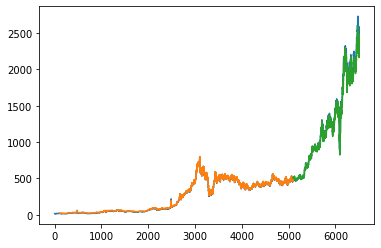

In [187]:
look_back=100
trainPredictPlot = np.empty_like(raw_df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predicted)+look_back, :] = train_predicted
# shift test predictions for plotting
testPredictPlot = np.empty_like(raw_df1)
testPredictPlot[:, :] = np.nan
# print(len(train_predicted)+(look_back*2)+1,len(raw_df1)-1,len(test_predicted))
testPredictPlot[len(train_predicted)+look_back:len(raw_df1), :] = test_predicted
# plot baseline and predictions

plt.plot(scaler.inverse_transform(raw_df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [199]:
x_input = dataset_x[-1].reshape(1,-1)
x_input.shape

(1, 100)

In [200]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7625515662385657,
 0.7632133588388416,
 0.7716141655017663,
 0.766944996164895,
 0.7783790264186569,
 0.7861548417659944,
 0.7768165030922516,
 0.7713936280182571,
 0.7649781090812857,
 0.7571102905222268,
 0.7618530624284753,
 0.7675883881228265,
 0.7625515662385657,
 0.7612096704705438,
 0.7722575574596979,
 0.7673126487122844,
 0.7654192741231783,
 0.7753090916180052,
 0.7697943034071633,
 0.7591875814599017,
 0.7511543372694923,
 0.7446652609844072,
 0.7505109453115607,
 0.7439116001008947,
 0.7575882568488079,
 0.7631949581964972,
 0.7690773989547286,
 0.7802908016501072,
 0.7636729245230783,
 0.7592978051642193,
 0.7633052719756889,
 0.7740591089868306,
 0.7715590536496075,
 0.7844820046603975,
 0.7947211641351437,
 0.7913203780717911,
 0.794408623439913,
 0.7854379373135597,
 0.7906218742617007,
 0.7984712021035414,
 0.8054198892941267,
 0.8156589586939988,
 0.8145376004094861,
 0.8302915480950742,
 0.8258429162417121,
 0.829133478600747,
 0.8391703210845801,
 0.8737664618238

In [201]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    if(len(temp_input)>100):
        print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0],'###')
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input),'@@@')
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.85661715] ###
101 @@@
[0.7625515662385657, 0.7632133588388416, 0.7716141655017663, 0.766944996164895, 0.7783790264186569, 0.7861548417659944, 0.7768165030922516, 0.7713936280182571, 0.7649781090812857, 0.7571102905222268, 0.7618530624284753, 0.7675883881228265, 0.7625515662385657, 0.7612096704705438, 0.7722575574596979, 0.7673126487122844, 0.7654192741231783, 0.7753090916180052, 0.7697943034071633, 0.7591875814599017, 0.7511543372694923, 0.7446652609844072, 0.7505109453115607, 0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.887406407361976

5 day output [[0.60730827]]
[0.7861548417659944, 0.7768165030922516, 0.7713936280182571, 0.7649781090812857, 0.7571102905222268, 0.7618530624284753, 0.7675883881228265, 0.7625515662385657, 0.7612096704705438, 0.7722575574596979, 0.7673126487122844, 0.7654192741231783, 0.7753090916180052, 0.7697943034071633, 0.7591875814599017, 0.7511543372694923, 0.7446652609844072, 0.7505109453115607, 0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.86639501023

10 day output [[0.5157477]]
[0.7618530624284753, 0.7675883881228265, 0.7625515662385657, 0.7612096704705438, 0.7722575574596979, 0.7673126487122844, 0.7654192741231783, 0.7753090916180052, 0.7697943034071633, 0.7591875814599017, 0.7511543372694923, 0.7446652609844072, 0.7505109453115607, 0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.87972241507

15 day output [[0.43624493]]
[0.7673126487122844, 0.7654192741231783, 0.7753090916180052, 0.7697943034071633, 0.7591875814599017, 0.7511543372694923, 0.7446652609844072, 0.7505109453115607, 0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437

19 day output [[0.39383066]]
[0.7591875814599017, 0.7511543372694923, 0.7446652609844072, 0.7505109453115607, 0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.9354033753

23 day output [[0.36051318]]
[0.7439116001008947, 0.7575882568488079, 0.7631949581964972, 0.7690773989547286, 0.7802908016501072, 0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.97772021959

28 day output [[0.33023727]]
[0.7636729245230783, 0.7592978051642193, 0.7633052719756889, 0.7740591089868306, 0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.9777202195982488, 0.9708818461868552, 0.97645183632473, 0.9864335669564044, 0.9884372553247022, 0.9910844257258

32 day output [[0.31246346]]
[0.7715590536496075, 0.7844820046603975, 0.7947211641351437, 0.7913203780717911, 0.794408623439913, 0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.9777202195982488, 0.9708818461868552, 0.97645183632473, 0.9864335669564044, 0.9884372553247022, 0.9910844257258055, 0.9999999999999999, 0.9884372553247022, 0.9597971579130126, 0.9615986193652

37 day output [[0.29631567]]
[0.7854379373135597, 0.7906218742617007, 0.7984712021035414, 0.8054198892941267, 0.8156589586939988, 0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.9777202195982488, 0.9708818461868552, 0.97645183632473, 0.9864335669564044, 0.9884372553247022, 0.9910844257258055, 0.9999999999999999, 0.9884372553247022, 0.9597971579130126, 0.9615986193652714, 0.9521867681970255, 0.9739701816298512, 0.9615986193652714, 0.951010298060354, 0.9280871257006

42 day output [[0.28504136]]
[0.8145376004094861, 0.8302915480950742, 0.8258429162417121, 0.829133478600747, 0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.9777202195982488, 0.9708818461868552, 0.97645183632473, 0.9864335669564044, 0.9884372553247022, 0.9910844257258055, 0.9999999999999999, 0.9884372553247022, 0.9597971579130126, 0.9615986193652714, 0.9521867681970255, 0.9739701816298512, 0.9615986193652714, 0.951010298060354, 0.9280871257006714, 0.9286570051640999, 0.9150538609106897, 0.9087302551105657, 0.915476625310238, 0.92273776312117

46 day output [[0.27850768]]
[0.8391703210845801, 0.8737664618238782, 0.8874064073619768, 0.8930314192771365, 0.8895204095094663, 0.8874064073619768, 0.8675347691606016, 0.8663950102337447, 0.8700164238554805, 0.8883622499402651, 0.8745201675610014, 0.8759172652560562, 0.8797224150766128, 0.8892078688142356, 0.9110463940992202, 0.9083993137729909, 0.9237488076265009, 0.9324254437748418, 0.9249988803325495, 0.9218370323950505, 0.9234730682159588, 0.935403375363772, 0.9549073610177579, 0.9367637618490123, 0.9413777292588509, 0.9777202195982488, 0.9708818461868552, 0.97645183632473, 0.9864335669564044, 0.9884372553247022, 0.9910844257258055, 0.9999999999999999, 0.9884372553247022, 0.9597971579130126, 0.9615986193652714, 0.9521867681970255, 0.9739701816298512, 0.9615986193652714, 0.951010298060354, 0.9280871257006714, 0.9286570051640999, 0.9150538609106897, 0.9087302551105657, 0.915476625310238, 0.9227377631211798, 0.933105546942588, 0.9348151853328733, 0.9489882090497119, 0.94336310705967

array([[2341.85457552],
       [2185.19004423],
       [1998.51053059],
       [1838.0669305 ],
       [1729.03828284],
       [1663.74453409],
       [1619.815737  ],
       [1577.92432977],
       [1528.9532076 ],
       [1472.9338222 ],
       [1414.70357617],
       [1359.55738101],
       [1310.63327428],
       [1268.40984075],
       [1231.61271878],
       [1198.45921249],
       [1167.52475399],
       [1138.05442121],
       [1109.86752893],
       [1083.09409917],
       [1057.92389597],
       [1034.45994802],
       [1012.68085516],
       [ 992.47191595],
       [ 973.67935745],
       [ 956.15248707],
       [ 939.77206393],
       [ 924.44997459],
       [ 910.12266716],
       [ 896.73915419],
       [ 884.25274449],
       [ 872.61593625],
       [ 861.77863371],
       [ 851.69017367],
       [ 842.299974  ],
       [ 833.56085715],
       [ 825.42710463],
       [ 817.85729424],
       [ 810.81275982],
       [ 804.25702388],
       [ 798.1561218 ],
       [ 792.477

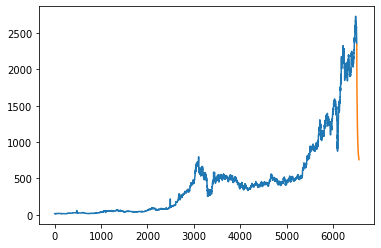

In [214]:
day_new=np.arange(1,6508)
day_pred=np.arange(6508,6558)
plt.plot(day_new,scaler.inverse_transform(raw_df1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
scaler.inverse_transform(lst_output)